##### **28. Salma Annissa Azizi (2141720137) / TI-3F**


## **Jobsheet 3 : Regresi**

#### **PRAKTIKUM 1**

**1. Persiapan Data**

**2. Import Library**

In [2]:
# melakukan import library yang digunakan untuk memanipulasi data
import numpy as np
import pandas as pd

**3. Baca Data**

In [6]:
# membaca data dari file CSV menggunakan library pandas
data = pd.read_csv('dataset.csv')

**4. Pemahaman Terhadap Data**

In [14]:
#menampilkan beberapa data awal, ukuran, informasi, dan deskripsi statik data

data.head() #data awal
data.shape #ukuran data
data.info() #informasi data
data.describe() #deskripsi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**5. Visualisasi Data**

c:\Users\00\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


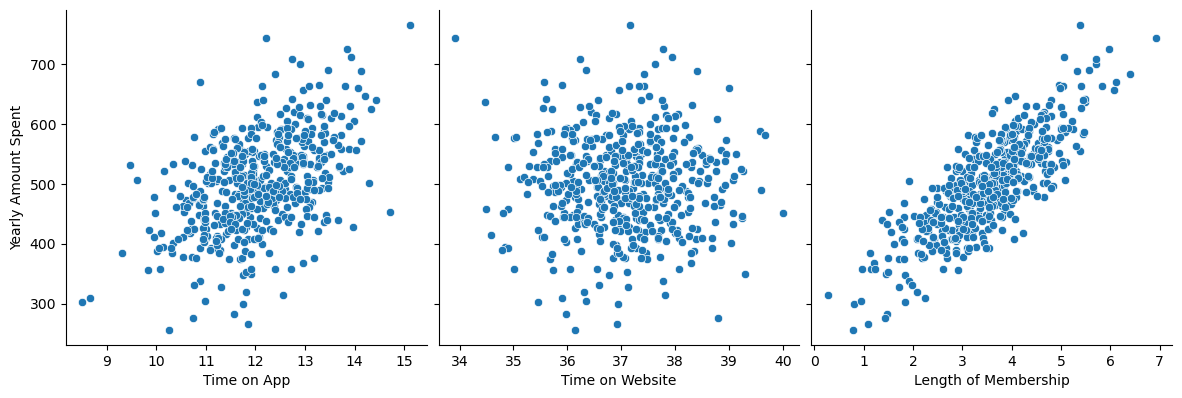

In [20]:
# memvisualisasikan data

# import library 
import matplotlib.pyplot as plt
import seaborn as sns

# menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'], 
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')

C:\Users\00\AppData\Local\Temp\ipykernel_3344\2662172037.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


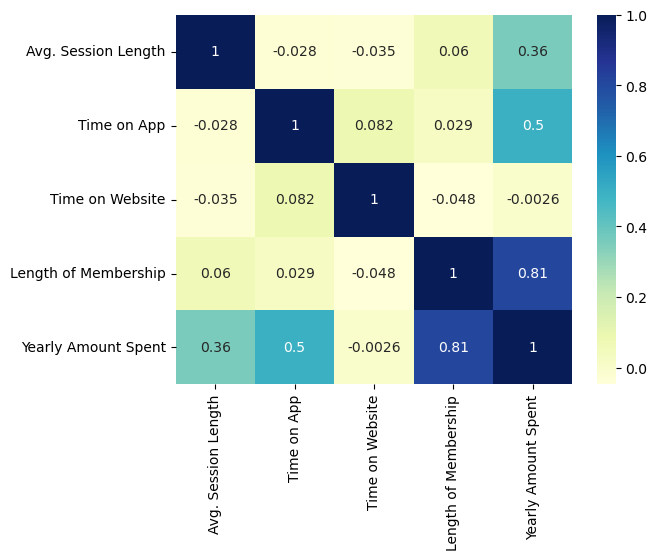

In [24]:
# memvisualisasikan korelasi antar variabel menggunakan heatmap
# semakin tinggi nilainya, maka semakin tinggi korelasinya
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

**6. Regresi Linier**

In [25]:
# membuat variabel independen dan dependen berdasarkan analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [26]:
# memisahkan variabel dengan proporsi 7:30 sebagai data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [27]:
# melakukan training regresi linier menggunakan library StatsModels
# menambahkan konstanta ke variabel bebas
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

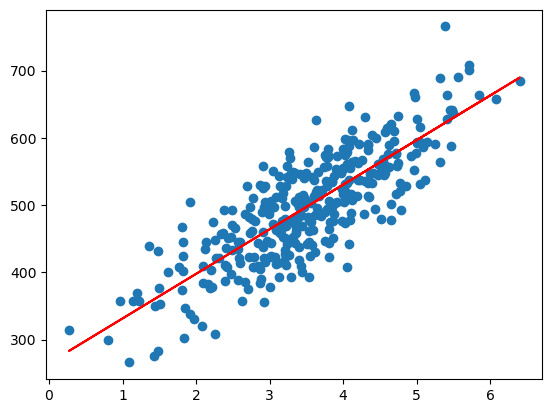

In [30]:
# memvisualisasikan garis regresi pada data train
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

**7. Analisis Residual**

In [31]:
# memprediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred) # menghitung residu

<Figure size 640x480 with 0 Axes>

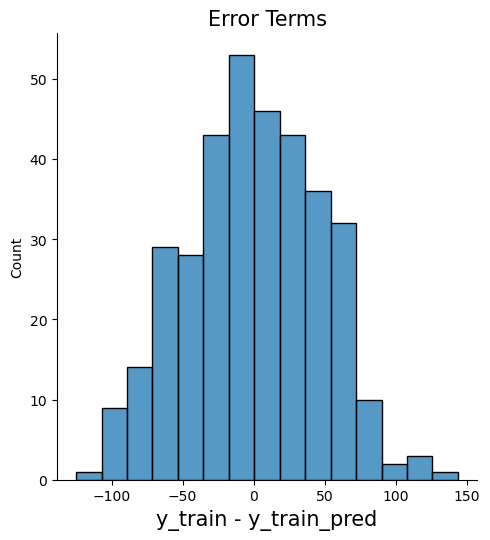

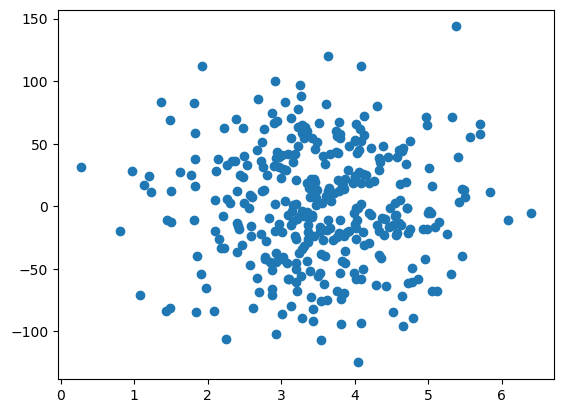

In [34]:
# melakukan prediksi nilai y data train dan menghitung residual
# nilai sebenarnya - nilai prediksi

# histogram residu
fig = plt.figure()
sns.displot(res,bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# scatter plot residu
plt.scatter(X_train, res)
plt.show()

**8. Prediksi pada Data Uji dan Evaluasi Model**

In [35]:
# melakukan prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [37]:
# menghitung nilai R2 untuk mengukur kinerja model pada data uji
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

**9. Visualisasi Hasil**

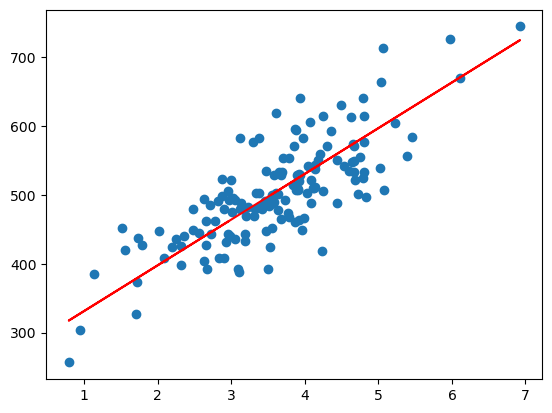

In [38]:
# memvisualisasikan hasil data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

#### **PRAKTIKUM 2 : SVR**

**1. Mengimpor Library**

In [46]:
# melakukan import library numpy, pandas, dan matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**2. Mengimpor Dataset**

In [40]:
# mengimport dataset
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:,2].values # mengubah menjadi satu kolom saja

**3. Feature Scaling**

In [41]:
# melakukan penskalaan fitur x dan y menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

**4. Fitting SVR ke Dataset**

In [43]:
# melakukan pembuatan model SVR dengan kernel RBF
# melatihnya dengan data yang telah di-scaled
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\00\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**5. Visualisasi Hasil SVR**

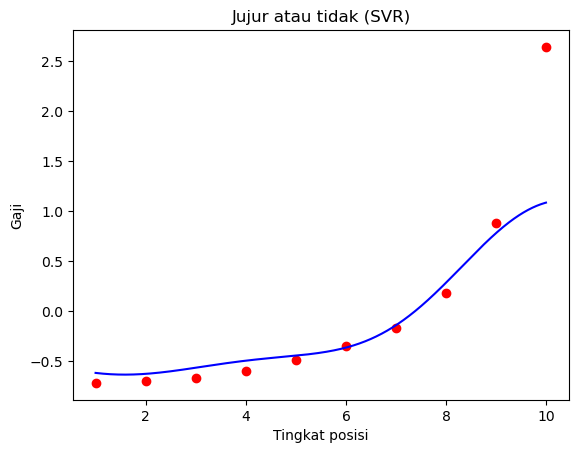

In [47]:
# melakukan visualisasi hasil prediksi model SVR menggunakan grafik
# plotting data asli (red dot) dan kurva hasil prediksi (blue line)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1,1)
plt.scatter(X, y, color='red')
plt.plot(X_grid,regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

**6. Prediksi Hasil**

In [53]:
# melakukan prediksi hasil dalam posisi tertentu

# membuat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])

# melakukan penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)

# melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)

# mengembalikan hasil prediksi ke sakala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1,1))

**7. Menampilkan Hasil**

In [54]:
# menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5 [90752.74868489]


**8. Validasi Hasil**

Sudah ditampilkan pada langkah 6 dan 7

**9. Evaluasi Model SVR**

In [55]:
# melakukan evaluasi model SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# menghitung RMSE
rmse = np.sqrt(mse)

# menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE", rmse)
print("R-squared", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE 0.4983973243687411
R-squared 0.7516001070620798


#### **TUGAS PRAKTIKUM**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
# membaca data dari file CSV 
datas = pd.read_csv('insurance.csv')

# menampilkan data 
datas.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

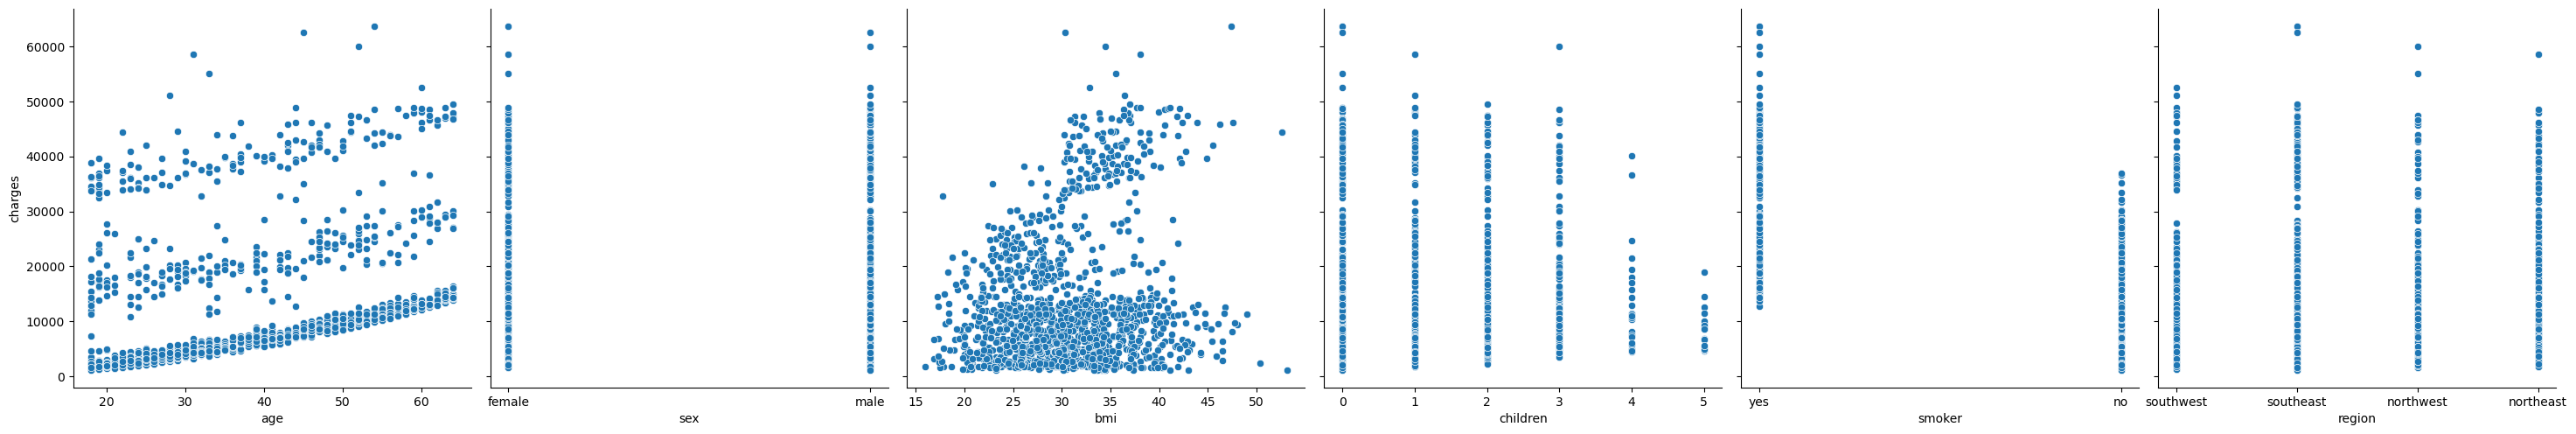

In [189]:
# mengidentifikasi variabel independen dan dependen

import seaborn as sns
sns.pairplot(datas, x_vars=['age', 'sex', 'bmi', 'children', 'smoker','region'],
             y_vars='charges', height=5, aspect=1, kind='scatter')

**2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [192]:
# merubah tipe data sex, smoker, dan region

datas['sex'] = datas['sex'].astype('category')
datas['sex'] = datas['sex'].cat.codes

datas['smoker'] = datas['smoker'].astype('category')
datas['smoker'] = datas['smoker'].cat.codes

datas['region'] = datas['region'].astype('category')
datas['region'] = datas['region'].cat.codes

datas

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [215]:
# menentukan variabel independen dan dependen
X = datas.drop(columns = 'charges')
y = datas['charges']
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [216]:
# membagi data train dan data test dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**3. Lakukan feature scaling jika diperlukan.**

In [197]:
# Feature Scaling
X = datas.iloc[:, 0:5].values
y = datas.iloc[:, 6].values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

**4. Buat model multiple linear regression menggunakan Scikit-Learn.**

In [199]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
c = model.intercept_
print("Konstanta = ", c)

m = model.coef_
print("Koefisien Regresi = ", m)

Konstanta =  -11827.733141795681
Koefisien Regresi =  [  256.5772619    -49.39232379   329.02381564   479.08499828
 23400.28378787  -276.31576201]


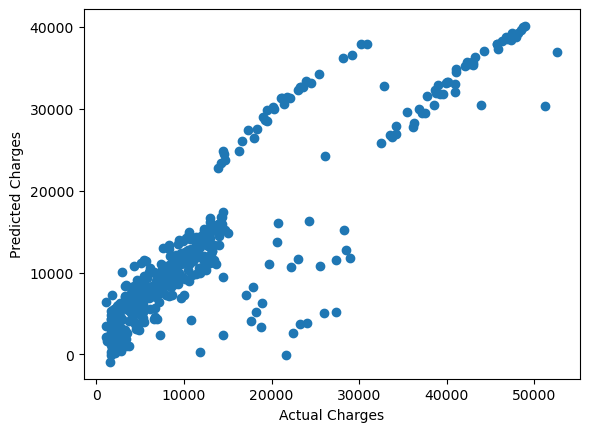

In [203]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

**5. Latih model pada data latih dan lakukan prediksi pada data uji**

In [229]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Hasil prediksi dan nilai target")
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

Hasil prediksi dan nilai target


,Actual value,Predicted value
12,1826.84300,4137.795178
306,20177.67113,4346.994621
318,7421.19455,8607.174287
815,1877.92940,2995.801113
157,15518.18025,25642.535475


**6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi**

In [231]:
regressor = LinearRegression()
regressor.fit(X, y)

# Make predictions
y_pred = regressor.predict(X)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 4172.48711494405
MSE: 36527659.88568238
RMSE: 6043.811701706331
R-squared: 0.7507372027994937
